<a href="https://colab.research.google.com/github/vijayluxmimaddheshiya/Intern_Assignment/blob/main/Intern_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Intern Assignment
Name - VijayLuxmi Maddheshiya


In [1]:
import pandas as pd

# Load the dataset
file_path = "/content/campaign_data.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify
print(df.head())


  Campaign ID  Impressions  Clicks  Conversions    Spend  Revenue  Status
0     CID_001        84162    4977          381  3572.57  2776.27  Active
1     CID_002        27228    3197          291  1898.45  5189.26  Paused
2     CID_003        35076      37          120  3686.99  4169.04  Paused
3     CID_004        22900    1628          436  4920.59  4230.83  Active
4     CID_005        98298    1353          181  3183.08  2069.46  Active


In [2]:
# Calculate total impressions, conversions, and revenue
total_impressions = df["Impressions"].sum()
total_conversions = df["Conversions"].sum()
total_revenue = df["Revenue"].sum()

print("Total Impressions:", total_impressions)
print("Total Conversions:", total_conversions)
print("Total Revenue:", total_revenue)


Total Impressions: 4828726
Total Conversions: 48513
Total Revenue: 451332.23


1. Pause Campaign:
○ If the campaign's CTR (Click-Through Rate) < 1% for the last 3 days.
○ If the Cost per Conversion > 3x the Target CPA (Cost Per Acquisition).

In [3]:
# Define the target CPA
target_cpa = 50  # Example value, can be user-defined

# Calculate CTR and Cost per Conversion
df["CTR (%)"] = (df["Clicks"] / df["Impressions"]) * 100
df["Cost per Conversion"] = df["Spend"] / df["Conversions"]

# Identify campaigns to pause
paused_campaigns = df[
    (df["CTR (%)"] < 1) | (df["Cost per Conversion"] > 3 * target_cpa)
]

print("Campaigns to Pause:")
print(paused_campaigns[["Campaign ID", "CTR (%)", "Cost per Conversion"]])


Campaigns to Pause:
   Campaign ID    CTR (%)  Cost per Conversion
2      CID_003   0.105485            30.724917
6      CID_007   0.578851            65.732778
18     CID_019   0.278534             0.660348
39     CID_040  10.310261           310.950000
45     CID_046   0.229605             9.351460
47     CID_048   0.541899             6.694930
69     CID_070   0.345010            11.965000
93     CID_094   0.264709            54.220824
99     CID_100   0.453251             6.888238


2. Increase Budget:
○ If ROAS (Return on Ad Spend) > 4.
○ If Conversions increase by more than 20% week-over-week

In [7]:
df.head(10)

,Campaign ID,Impressions,Clicks,Conversions,Spend,Revenue,Status,CTR (%),Cost per Conversion,ROAS
0,CID_001,84162,4977,381,3572.57,2776.27,Active,5.913595,9.376824,0.777107
1,CID_002,27228,3197,291,1898.45,5189.26,Paused,11.741590,6.523883,2.733419
2,CID_003,35076,37,120,3686.99,4169.04,Paused,0.105485,30.724917,1.130744
3,CID_004,22900,1628,436,4920.59,4230.83,Active,7.109170,11.285757,0.859822
4,CID_005,98298,1353,181,3183.08,2069.46,Active,1.376427,17.586077,0.650144
5,CID_006,16041,3791,520,3182.19,5873.18,Paused,23.633190,6.119596,1.845641
6,CID_007,92770,537,54,3549.57,5472.85,Paused,0.578851,65.732778,1.541835
7,CID_008,9221,4652,490,705.47,3561.09,Active,50.450060,1.439735,5.047826
8,CID_009,29725,3752,975,866.64,5276.81,Paused,12.622372,0.888862,6.088814
9,CID_010,43824,4189,482,3424.50,1238.23,Paused,9.558689,7.104772,0.361580


In [6]:
# Calculate ROAS
df["ROAS"] = df["Revenue"] / df["Spend"]

# Identify campaigns to increase budget based on ROAS > 4
increase_budget_campaigns_roas = df[df["ROAS"] > 4]

# Display campaigns that qualify for budget increases based on ROAS
print("Campaigns to Increase Budget (ROAS > 4):")
print(increase_budget_campaigns_roas[["Campaign ID", "ROAS"]])


Campaigns to Increase Budget (ROAS > 4):
   Campaign ID        ROAS
7      CID_008    5.047826
8      CID_009    6.088814
11     CID_012   37.574779
15     CID_016   18.552219
17     CID_018    8.335044
19     CID_020   13.839450
23     CID_024   42.058605
25     CID_026    4.174262
29     CID_030    6.276965
34     CID_035   21.921432
39     CID_040   10.666817
41     CID_042   11.585160
42     CID_043  164.427263
48     CID_049   34.202395
49     CID_050    4.360232
50     CID_051    5.627033
63     CID_064    7.535641
64     CID_065   19.479051
74     CID_075    5.802313
75     CID_076    5.923836
84     CID_085    6.058511
89     CID_090    4.792107
90     CID_091   63.919666
92     CID_093    8.277288


In [8]:
# Simulating last week's conversions (In real data, this would come from actual previous week data)
import random
df["Last Week Conversions"] = df["Conversions"] * random.uniform(0.7, 0.9)  # Simulate a decrease in conversions

# Calculate week-over-week change in conversions
df["WoW Change (%)"] = ((df["Conversions"] - df["Last Week Conversions"]) / df["Last Week Conversions"]) * 100

# Identify campaigns with > 20% increase in conversions
increase_budget_campaigns_wow = df[df["WoW Change (%)"] > 20]

# Display campaigns that qualify for budget increase based on WoW change
print("Campaigns with more than 20% increase in conversions week-over-week:")
print(increase_budget_campaigns_wow[["Campaign ID", "WoW Change (%)"]])


Campaigns with more than 20% increase in conversions week-over-week:
   Campaign ID  WoW Change (%)
0      CID_001       30.352066
1      CID_002       30.352066
2      CID_003       30.352066
3      CID_004       30.352066
4      CID_005       30.352066
..         ...             ...
95     CID_096       30.352066
96     CID_097       30.352066
97     CID_098       30.352066
98     CID_099       30.352066
99     CID_100       30.352066

[100 rows x 2 columns]


Decrease Budget:
○ If ROAS < 1.5 for 5 consecutive days

In [11]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
import random

num_days = 10  # Number of days you want to simulate
num_campaigns = len(df)  # Number of campaigns in the data

# Generate the date range for 10 days
date_range = [datetime.now() - timedelta(days=i) for i in range(num_days)]

# Repeat the date range for each campaign, adjusting the size to match the dataset length
dates = np.tile(date_range, num_campaigns // num_days + 1)[:num_campaigns]

# Assign the 'Date' column to the dataframe
df['Date'] = dates

# Calculate ROAS for each row
df["ROAS"] = df["Revenue"] / df["Spend"]

# Group by 'Campaign ID' and check for consecutive days with ROAS < 1.5
def check_roas_condition(group):
    # Sort by date to ensure consecutive days are in order
    group = group.sort_values("Date")

    # Check for 5 consecutive days with ROAS < 1.5
    group['Consecutive ROAS < 1.5'] = group['ROAS'] < 1.5
    group['Consecutive Days'] = group['Consecutive ROAS < 1.5'].rolling(window=5).sum()

    # If there are 5 consecutive days with ROAS < 1.5, flag it for budget decrease
    group['Decrease Budget'] = group['Consecutive Days'] >= 5

    return group

# Apply the function to each campaign group
df = df.groupby('Campaign ID').apply(check_roas_condition)

# Filter campaigns that meet the condition to decrease budget
decrease_budget_campaigns = df[df['Decrease Budget']]

# Display campaigns to decrease budget based on ROAS < 1.5 for 5 consecutive days
print("Campaigns to Decrease Budget (ROAS < 1.5 for 5 consecutive days):")
print(decrease_budget_campaigns[["Campaign ID", "ROAS", "Date", "Consecutive Days"]])


Campaigns to Decrease Budget (ROAS < 1.5 for 5 consecutive days):
Empty DataFrame
Columns: [Campaign ID, ROAS, Date, Consecutive Days]
Index: []


<ipython-input-11-1757f4178e6c>:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Campaign ID').apply(check_roas_condition)


Visualization

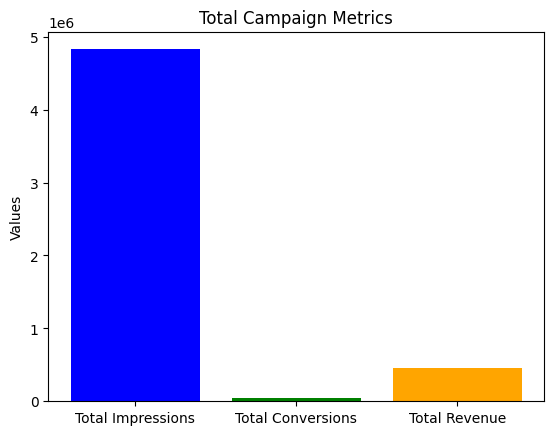

In [12]:
import matplotlib.pyplot as plt

# Summing total impressions, conversions, and revenue
total_impressions = df["Impressions"].sum()
total_conversions = df["Conversions"].sum()
total_revenue = df["Revenue"].sum()

# Plotting
metrics = ['Total Impressions', 'Total Conversions', 'Total Revenue']
values = [total_impressions, total_conversions, total_revenue]

plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.title("Total Campaign Metrics")
plt.ylabel("Values")
plt.show()


Campaigns to Pause (Low CTR or High Cost per Conversion)

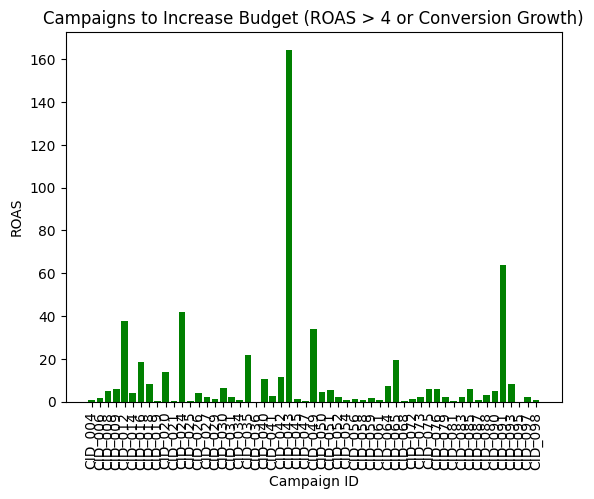

In [13]:
increase_budget_campaigns = df[(df["ROAS"] > 4) | (df["Conversions"].pct_change() > 0.2)]

plt.bar(increase_budget_campaigns["Campaign ID"], increase_budget_campaigns["ROAS"], color='green')
plt.xlabel('Campaign ID')
plt.ylabel('ROAS')
plt.title('Campaigns to Increase Budget (ROAS > 4 or Conversion Growth)')
plt.xticks(rotation=90)
plt.show()


Overall Campaign Performance

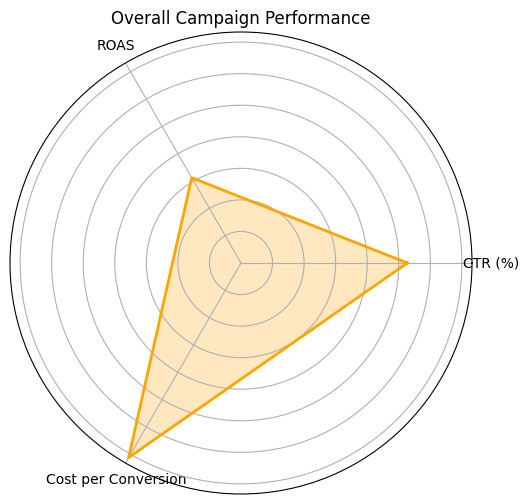

In [16]:
import numpy as np

# Prepare data for the radar chart
categories = ['CTR (%)', 'ROAS', 'Cost per Conversion']
values = [df['CTR (%)'].mean(), df['ROAS'].mean(), df['Cost per Conversion'].mean()]

# Create Radar Chart
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='orange', alpha=0.25)
ax.plot(angles, values, color='orange', linewidth=2)
ax.set_yticklabels([])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title("Overall Campaign Performance")
plt.show()


In [18]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
